<a href="https://colab.research.google.com/github/DanielaaVargas/NINE/blob/main/Copy_of_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install astropy==3.5;
!pip install pyregion;
!pip install photutils;
!pip install regions;
!pip install scipy;
!pip install aplpy

In [2]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import pyregion
from astropy.coordinates import Angle
from astropy import units as u
from astropy.stats import SigmaClip
from photutils.background import StdBackgroundRMS
from regions import Regions
from pyregion import get_mask
import aplpy
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
Drive_path = '/content/drive/MyDrive/NINE/'
Image = Drive_path + 'Imaging/NGC5258.fits'

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -9.755e-05
INFO:astropy:Auto-setting vmax to  4.812e-04


INFO: Auto-setting vmin to -9.755e-05 [aplpy.core]
INFO: Auto-setting vmax to  4.812e-04 [aplpy.core]


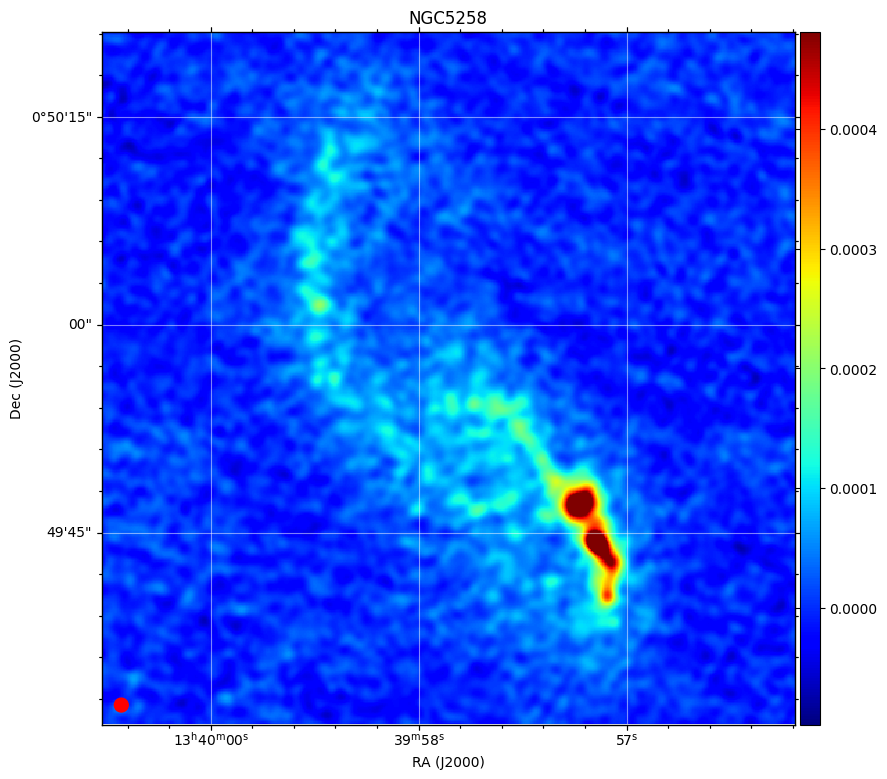

In [5]:
iMg = aplpy.FITSFigure(Image)
iMg.set_title("NGC5258")
iMg.show_colorscale(cmap='jet')
iMg.add_colorbar()
iMg.add_grid()
iMg.add_beam()
iMg.beam.set_color('red')

In [6]:
IMG =fits.open('/content/drive/MyDrive/NINE/Imaging/NGC5258.fits')
image = IMG[0].data.sum()
image

3.587452

In [29]:
vla_image, header = fits.getdata(Image, header = True)
region_file = Drive_path + 'Imaging/DS9.reg'
region = pyregion.open(region_file)
region

[Shape : circle ( Number(53),Number(419),Number(20) ),
 Shape : circle ( Number(393),Number(449),Number(19.932905) ),
 Shape : circle ( Number(441),Number(320),Number(27.573967) ),
 Shape : circle ( Number(38.456),Number(60.92),Number(24.447757) ),
 Shape : circle ( Number(145.592),Number(54.008),Number(23.584063) ),
 Shape : circle ( Number(453.176),Number(107.576),Number(14.395013) ),
 Shape : circle ( Number(73.016),Number(192.248),Number(53.362276) ),
 Shape : circle ( Number(373.688),Number(352.952),Number(39.456229) )]

In [30]:
rms_values = []
for K in range(len(region)):
  region = pyregion.open(region_file)
  m=len(region)
  del region[0:K]
  del region[1:m]

  mask = region.get_mask(shape=(vla_image.shape[0],vla_image.shape[1]), header=header)
  #mask = get_mask(region,data)
  maskdata= np.multiply(vla_image,mask)
  N=len(maskdata[maskdata!=0])
  rms_values.append(np.sqrt(np.sum(maskdata**2)/N))
avg_rms = np.mean(rms_values)
avg_rms

1.8055913129607442e-05